<a href="https://colab.research.google.com/github/kabirodavies/data-project/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies and load csv 
Import pandas, matplotlib, seaborn, and datetime dependencies

In [12]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 4.2 MB/s 


In [1]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Read Data
users_sessions_url = 'https://raw.githubusercontent.com/kabirodavies/data-project/main/user_sessions.csv'
users = pd.read_csv(users_sessions_url, encoding = 'utf8')

In [15]:
# Checking the shape (# No of columns and rows) of the dataset
users.shape

(11880, 25)

In [17]:
# Checking the names of columns
users.columns

Index(['session_id', 'datetime', 'supply_id', 'ip', 'user_device_id',
       'app_name', 'app_bundle', 'app_ver', 'channel_id', 'full_user_agent',
       'os_name', 'os_family', 'country', 'city', 'isp', 'carrier_id',
       'connection_type', 'region', 'device_type', 'ua_family', 'platform',
       'player_type', 'admanager_type', 'additional_data', 'default_language'],
      dtype='object')

In [21]:
# Checking for columns with missing or null values
users.isnull().sum(axis=0)

session_id              0
datetime                0
supply_id           10851
ip                      0
user_device_id        679
app_name                0
app_bundle             18
app_ver                 0
channel_id              0
full_user_agent         0
os_name              7868
os_family            7868
country                 2
city                  358
isp                    11
carrier_id             20
connection_type        59
region                340
device_type          7602
ua_family            9008
platform             7601
player_type          8189
admanager_type      11880
additional_data      2034
default_language        0
dtype: int64

# Data Engineering

In [23]:
# Checking the datatypes of the columns in the dataset 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   session_id        11880 non-null  object             
 1   datetime          11880 non-null  datetime64[ns, UTC]
 2   supply_id         1029 non-null   float64            
 3   ip                11880 non-null  object             
 4   user_device_id    11201 non-null  object             
 5   app_name          11880 non-null  object             
 6   app_bundle        11862 non-null  object             
 7   app_ver           11880 non-null  object             
 8   channel_id        11880 non-null  object             
 9   full_user_agent   11880 non-null  object             
 10  os_name           4012 non-null   object             
 11  os_family         4012 non-null   object             
 12  country           11878 non-null  object             
 13  c

In [22]:
#Change 'datetime' datatype from object to datetime
users['datetime'] =  pd.to_datetime(users['datetime'])

In [24]:
users['datetime']

0       2022-08-05 23:25:07.629000+00:00
1       2022-08-05 22:08:45.281000+00:00
2       2022-08-05 22:11:08.906000+00:00
3       2022-08-05 22:05:35.273000+00:00
4       2022-08-05 21:10:47.448000+00:00
                      ...               
11875   2022-08-21 06:24:49.144000+00:00
11876   2022-08-21 12:47:42.816000+00:00
11877   2022-08-21 10:39:19.457000+00:00
11878   2022-08-21 02:20:09.202000+00:00
11879   2022-08-21 19:53:30.537000+00:00
Name: datetime, Length: 11880, dtype: datetime64[ns, UTC]

In [49]:
# Extracting only date from the datetime column
users['date'] = pd.to_datetime(users['datetime'], format="%Y/%m/%d %H:%M").dt.date
users['date'] =  pd.to_datetime(users['date'])

In [52]:
#Cheking the minimun and maximum dates and the time difference in days
dates = "The First date is {}, And The last date is {}".format(users['date'].min(), users['date'].max())
print(dates)

#Time difference in days
time_diff_days = users['date'].max() - users['date'].min()
print('Time Difference is', time_diff_days)

The First date is 2022-08-04 00:00:00, And The last date is 2022-10-20 00:00:00
Time Difference is 77 days 00:00:00


In [88]:
#Transforming the default_language column to have a uniform label for English
users['default_language'] = users['default_language'].replace(['en', 'en-us'], 'English')

# Checking for Data Integrity in columns of interest

**When a value occurs too many times it is worth investigating it futher. The choice of a column to user to identify a user is important.**

In [190]:
# Number of times user_device_id has occured 
users['user_device_id'].value_counts(sort=True) 

6B2848FC-05A4-4E27-A032-28A033AFE5DE    7601
02:00:00:00:00:00                         89
cb3de4e3-1e92-4422-a18d-003a930a7438       4
065cbf4b-6ccb-51e7-bed5-d6ccc695e747       3
ff016244-4894-a65f-596c-c3ce92b2049a       3
059435ab-8abd-50df-9e7c-f9b0dff1ecd8       3
e24e2306-a20f-50fc-9efc-b7203bee21a1       3
b57fda95-6595-f35c-59f3-e549050584b9       3
9f219ccb-b203-3e8f-a357-db162e5b6d57       2
b9fddf8a-0153-e558-4c9b-9bace3637ad9       2
ae6a7ba9-e241-483e-a2e1-e7d5a941f6fe       2
d2wtWs5yTiOSa_hpRmtM5f                     2
                                        ... 
82501323-ce70-50d3-90b0-ebaee1f74272       1
e9f4aaca-884c-ef51-5b88-b4d7962335d8       1
2bbb2471-4012-5350-7eef-92f733d1f1b1       1
2e893e5e-ef28-e75c-47ce-ea13dc50ccef       1
ac4de29e-0d74-5b59-42b9-02df896ae751       1
910acf44-98af-bb5b-6397-9451af886511       1
1010481395                                 1
1019040057                                 1
1007668544                                 1
1062439763

In [191]:
# Number of times ip has occured 
users['ip'].value_counts(sort=True) 

178.118.24.64                              7601
176.112.65.246                               10
36.255.44.74                                  4
154.27.65.112                                 4
46.39.65.243                                  3
99.114.64.165                                 3
194.49.68.154                                 3
51.81.116.103                                 3
66.249.66.210                                 3
125.16.14.70                                  3
154.27.65.96                                  3
2409:4070:248f:efda::1b0d:d8a5                2
                                           ... 
87.7.206.38                                   1
201.251.120.150                               1
171.236.57.179                                1
79.217.174.160                                1
45.183.27.149                                 1
191.37.157.159                                1
138.59.143.244                                1
109.101.200.58                          

# Investigating user with 7601 records

In [105]:
# Investigating 178.118.24.64 with 7601 records
device_id_one = users[users['ip'] == '178.118.24.64'] 
device_id_one.head()

,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,...,connection_type,region,device_type,ua_family,platform,player_type,admanager_type,additional_data,default_language,date
78,5.2.7,2022-10-20 08:59:23.669000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
79,5.2.7,2022-10-20 09:34:15.711000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
80,5.2.7,2022-10-20 11:44:50.258000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
81,5.2.7,2022-10-20 10:32:41.610000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20
82,5.2.7,2022-10-20 11:53:27.485000+00:00,NaN,178.118.24.64,6B2848FC-05A4-4E27-A032-28A033AFE5DE,FashionTV%2B,com.appletv.ftv,5.2.7,1235,Fashion Tv/5.2.7 (com.fashiontvplus.multistrea...,...,Cable/DSL,West Flanders Province,NaN,NaN,NaN,NaN,NaN,"[{""internal_ip"":""[internal_ip]""}]",English,2022-10-20


In [115]:
#Cheking the minimun and maximum dates and the time difference in days
device_id_one_dates = "The First date is {}, And The last date is {}".format(device_id_one['datetime'].min(), device_id_one['datetime'].max())
print(dates)

#Time difference in days
one_time_diff_days = device_id_one['datetime'].max() - device_id_one['datetime'].min()
print('Time Difference is', one_time_diff_days)

The First date is 2022-08-04 00:00:00, And The last date is 2022-10-20 00:00:00
Time Difference is 0 days 05:23:16.458000


In [193]:
device_id_one.shape

(7601, 26)

**It's highly unlikely a user visited the app or apps 7601 times in a duration of five hours. Untill I understand better why this happened, I will drop this user**

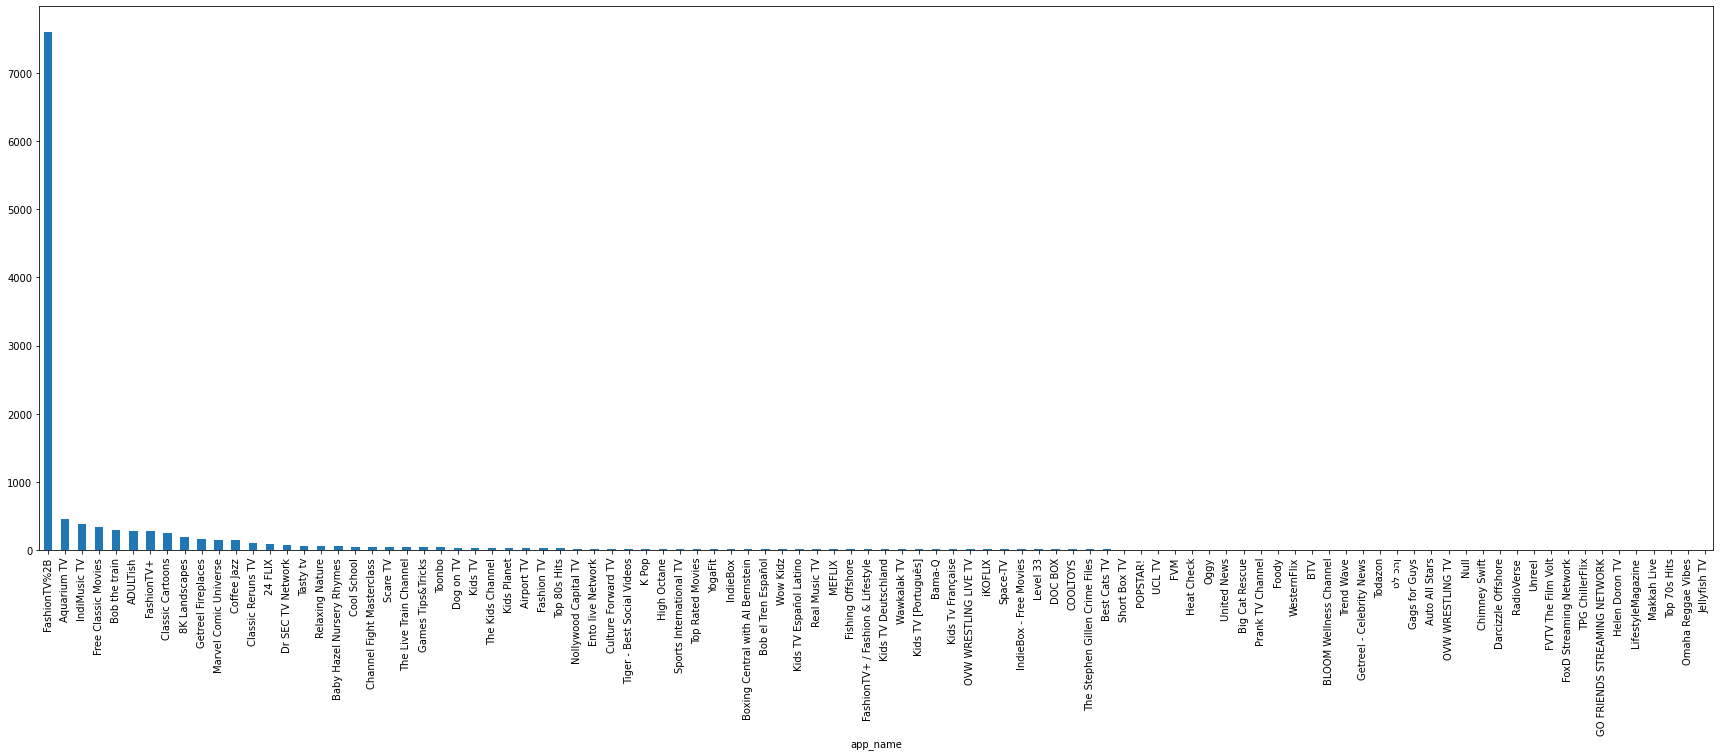

In [192]:
#check user frequency
#calculate sum of values by group
df_name_freq = users.groupby(['app_name'])['ip'].size()

#create bar plot by group
df_name_freq = df_name_freq.sort_values(ascending=False)
df_name_freq.plot(kind='bar',  figsize=(30, 10))

In [194]:
# #Filter out records of ip 178.118.24.64
# df_filtered = users[users['ip'] != '178.118.24.64']
df_filtered = users

In [195]:
df_filtered.shape

(11880, 26)


# Investigating user with 89 records
**For this user the ip addresss is unique and can be used to differentiate users.**


In [116]:
# Investigating user_device_id '02:00:00:00:00:00'
device_id_two = users[users['user_device_id'] == '02:00:00:00:00:00'] 
device_id_two.head()

,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,...,connection_type,region,device_type,ua_family,platform,player_type,admanager_type,additional_data,default_language,date
178,1659891270189,2022-08-07 16:54:32.867000+00:00,1079.0,50.64.176.70,02:00:00:00:00:00,Classic Reruns TV,com.amazon.classicreruns,5.1.8,B099F57QGP,okhttp/3.10.0,...,Cable/DSL,British Columbia,Unrecognized,OkHttp,AndroidTV,Exoplayer,NaN,"[{""device_info"":""8p""}]",中文,2022-08-07
491,1664070165976,2022-09-25 01:42:47.610000+00:00,1079.0,2603:90c8:1:95ef:98ca:1e6e:c336:fa4e,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,Cable/DSL,Alabama,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftss""}]",English,2022-09-25
492,1664067596494,2022-09-25 00:59:57.057000+00:00,1079.0,162.81.182.39,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,NaN,NaN,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftmm""}]",English,2022-09-25
513,1666154251949,2022-10-19 04:37:38.757000+00:00,1079.0,2804:18:580f:3ff2:1:0:52d5:790b,02:00:00:00:00:00,United News,com.andromobile.unitednews,5.1.8,com.andromobile.unitednews,okhttp/3.10.0,...,Cellular,Rio de Janeiro,Unrecognized,OkHttp,AndroidMobile,Exoplayer,NaN,"[{""placement_id"":""23552196""},{""device_info"":""s...",português,2022-10-19
543,1662853712521,2022-09-10 23:48:33.296000+00:00,1079.0,2600:1700:3c70:32f0:74ac:4893:f1:57be,02:00:00:00:00:00,Dr SEC TV Network,B08FMRKQ78,5.1.6,B08FMRKQ78,okhttp/3.10.0,...,Cable/DSL,Louisiana,Unrecognized,OkHttp,AmazonTV,Exoplayer,NaN,"[{""device_info"":""aftmm""}]",English,2022-09-10


#Selecting Columns Neccessary For The Analysis

In [196]:
# Checking the names of columns
df_filtered.columns

Index(['session_id', 'datetime', 'supply_id', 'ip', 'user_device_id',
       'app_name', 'app_bundle', 'app_ver', 'channel_id', 'full_user_agent',
       'os_name', 'os_family', 'country', 'city', 'isp', 'carrier_id',
       'connection_type', 'region', 'device_type', 'ua_family', 'platform',
       'player_type', 'admanager_type', 'additional_data', 'default_language',
       'date'],
      dtype='object')

### Selecting only wanted columns
**The Aim of this analysis is to check for user frequency and user recency to determine the most valiable users and users churn likelyhood.**
**Date and IP columns are the most important to compute for recency and frequency. Other Columns can be used for further analysi of user behaviour**


In [197]:
# Select columns neccessary for this analysis
necessary_cols = ['date', 'ip', 'app_name', 'app_ver', 'isp', 'connection_type', 'default_language']
data = df_filtered[necessary_cols]
data.head()

,date,ip,app_name,app_ver,isp,connection_type,default_language
0,2022-08-05,97.118.20.38,Aquarium TV,V_s5.1.9b,CenturyLink,Cable/DSL,English
1,2022-08-05,189.203.104.188,ADULTish,V_s5.1.9b,Totalplay,Cable/DSL,English
2,2022-08-05,81.111.134.45,Aquarium TV,5.8.4,Virgin Media,Cable/DSL,English
3,2022-08-05,36.68.10.202,Culture Forward TV,5.8.4,PT Telkom Indonesia,Cable/DSL,English
4,2022-08-05,216.238.178.89,Aquarium TV,5.2.0,Auburn Essential Services,Cable/DSL,English


In [198]:
data.isnull().sum()

date                 0
ip                   0
app_name             0
app_ver              0
isp                 11
connection_type     59
default_language     0
dtype: int64

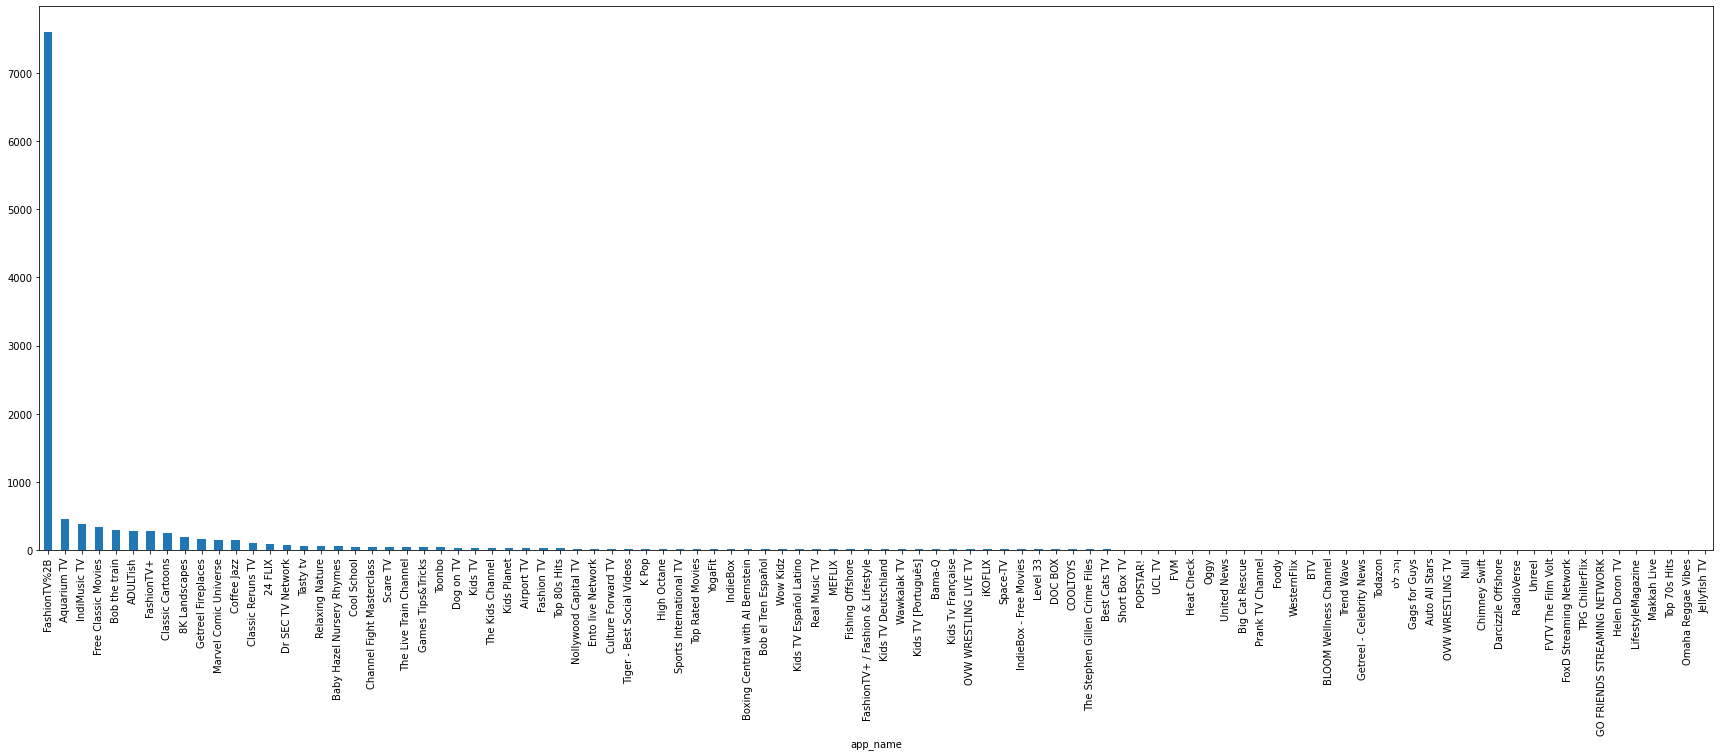

In [199]:
#check user frequency of users 
#calculate count of values by group
df_name_freq = data.groupby(['app_name'])['ip'].count()

#create bar plot by group
df_name_freq = df_name_freq.sort_values(ascending=False)
df_name_freq.plot(kind='bar',  figsize=(30, 10))

#Churn
Any user who visits any of the applications, details like user_id and ip are recorded. We are going to check over the duration of 77 days the frequency of returning users.
Users who visited only once are going to be classified as users who churned.

#Checking count of repeating ips

In [208]:
#Print records existing unique user ips
print(data['ip'].nunique())

4166


In [201]:
#Checking for users who visited at least once
data['ip'].value_counts()
visit_once = data['ip'].value_counts().loc[lambda x : x==1]
len(visit_once)

4070

In [202]:
# Checking for users who visited more than once
returning_users = data['ip'].value_counts().loc[lambda x : x!=1]
len(returning_users)

96

In [203]:
#Check the Last app visit date
last_visit_date = data['date'].dt.date.max()
print(last_visit_date)

2022-10-20


In [245]:
from lifetimes.plotting import *
from lifetimes.utils import *
#Built-in utility functions from lifetimes package to transform the transactional data (one row per visit) 
#into summary data (frequency, recency, and age)

data_df = summary_data_from_transaction_data(data, 'ip', 'date',  monetary_value_col=None, observation_period_end='2022-10-20')
data_df = data_df.reset_index()
data_df.head()

,ip,frequency,recency,T
0,1.123.101.22,0.0,0.0,0.0
1,1.123.147.77,0.0,0.0,24.0
2,1.147.96.230,0.0,0.0,13.0
3,1.152.109.42,0.0,0.0,22.0
4,1.157.5.57,0.0,0.0,0.0


**Context**
*   **Frequency: represents count of times a user visits**
*   **Recency: represents time in days since a user last visited**
*   **T: represents time in days since a user last visited from the last day**






In [210]:
data_df.shape, data.shape

((4166, 4), (11880, 7))

In [211]:
data_df['recency'].max(), data_df['frequency'].max(), 

(74.0, 3.0)

# Churn = Lost Customers ÷ Total Customers

count    4166.000000
mean        0.012482
std         0.121368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of users visiting only once: 98.85 %


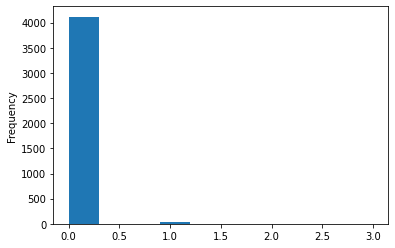

In [212]:
%matplotlib inline
#Create histogram to find out how many customers purchased item only once.
data_df['frequency'].plot(kind='hist', bins=10)
print(data_df['frequency'].describe())
print("---------------------------------------")
one_time_visitors = round(sum(data_df['frequency'] == 0)/float(len(data_df))*(100),2)
print("Percentage of users visiting only once:", one_time_visitors ,"%")

In [213]:
data_df['frequency'].value_counts()

0.0    4118
1.0      45
2.0       2
3.0       1
Name: frequency, dtype: int64

In [214]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data_df['frequency'], data_df['recency'], data_df['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4166 subjects, a: 1.10, alpha: 5.80, b: 0.14, r: 0.01>


In [215]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.006260,0.002019,0.002303,0.010218
alpha,5.795295,3.866564,-1.783171,13.373761
a,1.102557,1.877163,-2.576682,4.781795
b,0.138199,0.254711,-0.361034,0.637432


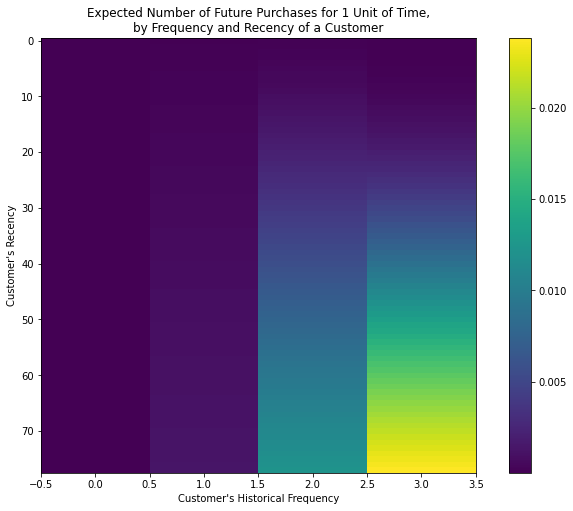

In [216]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

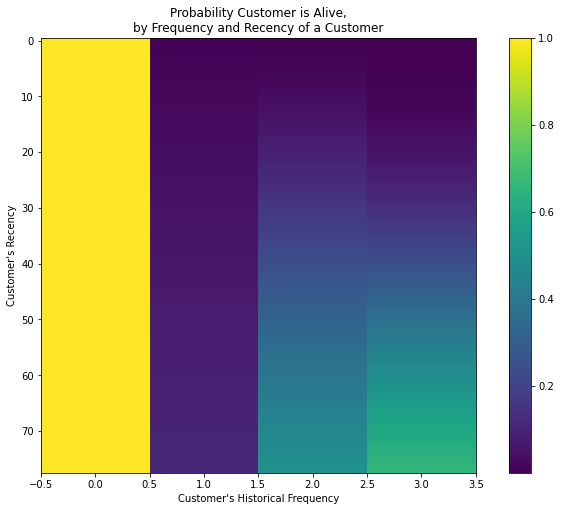

In [183]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [229]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 90
data_df['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, data_df['frequency'], data_df['recency'], data_df['T']),2)
data_df.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,ip,frequency,recency,T,pred_num_txn
0,2717,36.255.44.74,3.0,74.0,77.0,1.38
1,3280,66.249.66.210,2.0,25.0,25.0,1.36
2,3391,70.130.112.237,1.0,15.0,15.0,0.19
3,2170,209.236.122.58,1.0,23.0,29.0,0.12
4,581,154.27.65.82,1.0,23.0,29.0,0.12
5,340,121.66.144.141,1.0,39.0,41.0,0.12
6,3139,51.81.116.103,1.0,23.0,29.0,0.12
7,1747,192.227.119.213,1.0,23.0,29.0,0.12
8,580,154.27.65.112,1.0,23.0,29.0,0.12
9,3408,71.10.120.217,1.0,59.0,60.0,0.10


In [231]:
data_df['pred_num_txn'].max()

1.38

/usr/local/lib/python3.7/dist-packages/lifetimes/generate_data.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)
/usr/local/lib/python3.7/dist-packages/lifetimes/generate_data.py:54: RuntimeWarning: overflow encountered in double_scalars
  next_purchase_in = random.exponential(scale=1.0 / l)


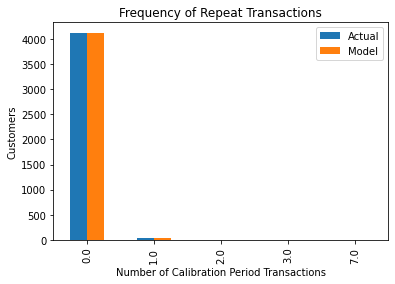

In [232]:
#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [238]:
data_df.loc[2717]

ip              36.255.44.74
frequency                3.0
recency                 74.0
T                       77.0
pred_num_txn            1.38
Name: 2717, dtype: object

In [239]:
#Customer's future transaction prediction for next 10 days

t = 90
individual = data_df.loc[2717]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that user 1.123.101.22 future visits in 90 days.

1.3780321234316202

#User Lifetime Value = = Customer Value * Average Customer Lifespan

In [242]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
data_df[['recency', 'frequency', 'T']].corr()

,recency,frequency,T
recency,1.000000,0.731991,0.068571
frequency,0.731991,1.000000,0.059534
T,0.068571,0.059534,1.000000


In [243]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = data_df[data_df['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   index               ip  frequency  recency     T  pred_num_txn
0     10     1.251.190.68        1.0     16.0  41.0          0.06
1    112  104.175.157.255        1.0     57.0  72.0          0.07
2    290    116.105.78.21        1.0      2.0  76.0          0.01
3    340   121.66.144.141        1.0     39.0  41.0          0.12
4    358     125.16.14.70        2.0      4.0  41.0          0.09
-----------------------------------------
The Number of Returning Customers are:  48


### From this we can see a huge number of people have visited once. We will create a new 'churn' feature with values "yes" and "no"

In [ ]:
df_filtered['Counts'] = df_filtered.groupby(['ip'])['ip'].transform('count')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_filtered[df_filtered['Counts']>1]

In [ ]:
#Creating new column Churn

def create_churn_value(df_filtered):
  if df_filtered['Counts'] == 1:
    return 'Yes'
  else:
    return 'No'



In [ ]:
df_filtered['Churn'] = df_filtered.apply(lambda df_filtered: create_churn_value(df_filtered), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_filtered.head()

,session_id,datetime,supply_id,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,...,region,device_type,ua_family,platform,player_type,admanager_type,additional_data,default_language,Counts,Churn
0,165974190292,2022-08-05 23:25:07.629000+00:00,NaN,97.118.20.38,a91d4e73-a52b-541d-a00e-1d3c107fa30b,Aquarium TV,295844,V_s5.1.9b,rroj18xvx1,Roku/DVP-11.0 (11.0.0.4193-C2),...,Colorado,Smart TV,NaN,Roku,roku,NaN,"[{""placement_id"":""-1""},{""internal_ip"":""192.168...",en,1,Yes
1,1659737311791,2022-08-05 22:08:45.281000+00:00,NaN,189.203.104.188,38bf94c0-d490-5661-a04d-3caf57b71752,ADULTish,598227,V_s5.1.9b,9bktlu45c8,Roku/DVP-11.0 (11.0.0.4193-AX),...,Mexico City,Smart TV,NaN,Roku,roku,NaN,"[{""placement_id"":""-1""},{""internal_ip"":""192.168...",en,1,Yes
2,1659737466142.6a8116ded11a2,2022-08-05 22:11:08.906000+00:00,NaN,81.111.134.45,16156f82-d8d5-d35d-4081-1defdbfa0eea,Aquarium TV,1080847,5.8.4,399,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,...,West Sussex,Smart TV,LG Web Browser Engine,lg,NaN,NaN,NaN,en,1,Yes
3,1659737131737.17e4649fdf01e,2022-08-05 22:05:35.273000+00:00,NaN,36.68.10.202,be0493d1-6714-4e51-5e53-90a369723b98,Culture Forward TV,1147808,5.8.4,1292,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,...,Central Java,Smart TV,LG Web Browser Engine,lg,NaN,NaN,NaN,en,1,Yes
4,1659733846726,2022-08-05 21:10:47.448000+00:00,1079.0,216.238.178.89,90:A8:22:A5:7A:34,Aquarium TV,B07VQ9SNGK,5.2.0,B07VQ9SNGK,Dalvik/2.1.0 (Linux; U; Android 9; AFTR Build/...,...,Indiana,Smart TV,Android HttpURLConnection,AmazonTV,Exoplayer,NaN,"[{""internal_ip"":""192.168.0.136""},{""device_info...",English,1,Yes


In [ ]:
df_filtered.to_csv("df_filtered")

In [ ]:
df_filtered.shape

(4279, 27)

#Droping columns that don't tell much about churn

In [ ]:
new_df = df_filtered.drop( ['supply_id', 'additional_data', 'Counts', 'admanager_type'], axis=1)


In [ ]:
new_df.head()

,session_id,datetime,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,os_name,...,isp,carrier_id,connection_type,region,device_type,ua_family,platform,player_type,default_language,Churn
0,165974190292,2022-08-05 23:25:07.629000+00:00,97.118.20.38,a91d4e73-a52b-541d-a00e-1d3c107fa30b,Aquarium TV,295844,V_s5.1.9b,rroj18xvx1,Roku/DVP-11.0 (11.0.0.4193-C2),Roku OS,...,CenturyLink,209.0,Cable/DSL,Colorado,Smart TV,NaN,Roku,roku,en,Yes
1,1659737311791,2022-08-05 22:08:45.281000+00:00,189.203.104.188,38bf94c0-d490-5661-a04d-3caf57b71752,ADULTish,598227,V_s5.1.9b,9bktlu45c8,Roku/DVP-11.0 (11.0.0.4193-AX),Roku OS,...,Totalplay,17072.0,Cable/DSL,Mexico City,Smart TV,NaN,Roku,roku,en,Yes
2,1659737466142.6a8116ded11a2,2022-08-05 22:11:08.906000+00:00,81.111.134.45,16156f82-d8d5-d35d-4081-1defdbfa0eea,Aquarium TV,1080847,5.8.4,399,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,...,Virgin Media,5089.0,Cable/DSL,West Sussex,Smart TV,LG Web Browser Engine,lg,NaN,en,Yes
3,1659737131737.17e4649fdf01e,2022-08-05 22:05:35.273000+00:00,36.68.10.202,be0493d1-6714-4e51-5e53-90a369723b98,Culture Forward TV,1147808,5.8.4,1292,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,...,PT Telkom Indonesia,7713.0,Cable/DSL,Central Java,Smart TV,LG Web Browser Engine,lg,NaN,en,Yes
4,1659733846726,2022-08-05 21:10:47.448000+00:00,216.238.178.89,90:A8:22:A5:7A:34,Aquarium TV,B07VQ9SNGK,5.2.0,B07VQ9SNGK,Dalvik/2.1.0 (Linux; U; Android 9; AFTR Build/...,Fire OS,...,Auburn Essential Services,14140.0,Cable/DSL,Indiana,Smart TV,Android HttpURLConnection,AmazonTV,Exoplayer,English,Yes


In [ ]:
new_df['default_language'] = new_df['default_language'].replace(['en', 'en-us'], 'English')


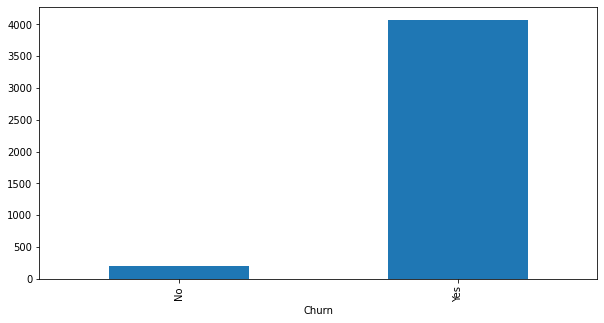

In [ ]:
#check user frequency
#calculate sum of values by group
churn_cust = new_df.groupby(['Churn'])['region'].size()

#create bar plot by group
churn_cust.plot(kind='bar',  figsize=(10, 5))

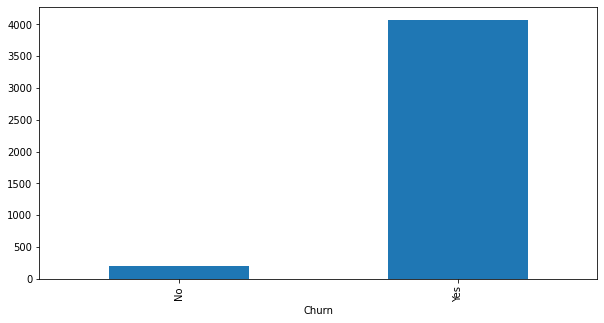

In [ ]:
#check user frequency
#calculate sum of values by group
churn_cust = new_df.groupby(['Churn'])['Churn'].size()

#create bar plot by group
churn_cust.plot(kind='bar',  figsize=(10, 5))

In [ ]:
# users['datetime'] =  pd.to_datetime(users['datetime'])
new_df['day_of_week'] = new_df['datetime'].dt.day_name()
new_df.head()

,session_id,datetime,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,os_name,...,carrier_id,connection_type,region,device_type,ua_family,platform,player_type,default_language,Churn,day_of_week
0,165974190292,2022-08-05 23:25:07.629000+00:00,97.118.20.38,a91d4e73-a52b-541d-a00e-1d3c107fa30b,Aquarium TV,295844,V_s5.1.9b,rroj18xvx1,Roku/DVP-11.0 (11.0.0.4193-C2),Roku OS,...,209.0,Cable/DSL,Colorado,Smart TV,NaN,Roku,roku,English,Yes,Friday
1,1659737311791,2022-08-05 22:08:45.281000+00:00,189.203.104.188,38bf94c0-d490-5661-a04d-3caf57b71752,ADULTish,598227,V_s5.1.9b,9bktlu45c8,Roku/DVP-11.0 (11.0.0.4193-AX),Roku OS,...,17072.0,Cable/DSL,Mexico City,Smart TV,NaN,Roku,roku,English,Yes,Friday
2,1659737466142.6a8116ded11a2,2022-08-05 22:11:08.906000+00:00,81.111.134.45,16156f82-d8d5-d35d-4081-1defdbfa0eea,Aquarium TV,1080847,5.8.4,399,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,...,5089.0,Cable/DSL,West Sussex,Smart TV,LG Web Browser Engine,lg,NaN,English,Yes,Friday
3,1659737131737.17e4649fdf01e,2022-08-05 22:05:35.273000+00:00,36.68.10.202,be0493d1-6714-4e51-5e53-90a369723b98,Culture Forward TV,1147808,5.8.4,1292,Mozilla/5.0 (Web0S; Linux/SmartTV) AppleWebKit...,Linux,...,7713.0,Cable/DSL,Central Java,Smart TV,LG Web Browser Engine,lg,NaN,English,Yes,Friday
4,1659733846726,2022-08-05 21:10:47.448000+00:00,216.238.178.89,90:A8:22:A5:7A:34,Aquarium TV,B07VQ9SNGK,5.2.0,B07VQ9SNGK,Dalvik/2.1.0 (Linux; U; Android 9; AFTR Build/...,Fire OS,...,14140.0,Cable/DSL,Indiana,Smart TV,Android HttpURLConnection,AmazonTV,Exoplayer,English,Yes,Friday


In [ ]:
grouping = new_df.groupby(['datetime','ip'])


#Churn By Week

In [ ]:
churn_ip = new_df[new_df['Churn']== 'Yes']
non_churn_ip = new_df[new_df['Churn']== 'No']

In [ ]:
churn_day_freq = churn_ip.groupby(['day_of_week'])['Churn'].size()
non_churn_day_freq = non_churn_ip.groupby(['day_of_week'])['Churn'].size()

In [ ]:
new_df.head(2) 

,session_id,datetime,ip,user_device_id,app_name,app_bundle,app_ver,channel_id,full_user_agent,os_name,...,carrier_id,connection_type,region,device_type,ua_family,platform,player_type,default_language,Churn,day_of_week
0,165974190292,2022-08-05 23:25:07.629000+00:00,97.118.20.38,a91d4e73-a52b-541d-a00e-1d3c107fa30b,Aquarium TV,295844,V_s5.1.9b,rroj18xvx1,Roku/DVP-11.0 (11.0.0.4193-C2),Roku OS,...,209.0,Cable/DSL,Colorado,Smart TV,NaN,Roku,roku,English,Yes,Friday
1,1659737311791,2022-08-05 22:08:45.281000+00:00,189.203.104.188,38bf94c0-d490-5661-a04d-3caf57b71752,ADULTish,598227,V_s5.1.9b,9bktlu45c8,Roku/DVP-11.0 (11.0.0.4193-AX),Roku OS,...,17072.0,Cable/DSL,Mexico City,Smart TV,NaN,Roku,roku,English,Yes,Friday


In [ ]:
new_df['platform'].value_counts()

Roku             1212
lg                579
zeasn             524
AndroidTV         484
Castify Web       482
samsung           433
AndroidMobile     386
AmazonTV          161
vidaa               7
emulator            6
vizio               3
Apple TV            1
tvOS                1
Name: platform, dtype: int64

In [ ]:
def select_columns(new_df, column_names):
    new_frame = new_df.loc[:, column_names]
    return new_frame

In [ ]:
column_names = ['ip', 'app_name', 'app_ver', 'channel_id', 'os_name', 'country', 'device_type', 'platform', 'default_language', 'Churn']
new = select_columns(new_df, column_names)

In [ ]:
# ip_address to row
df = new.set_index('ip')
df.head()


,app_name,app_ver,channel_id,os_name,country,device_type,platform,default_language,Churn
ip,,,,,,,,,
97.118.20.38,Aquarium TV,V_s5.1.9b,rroj18xvx1,Roku OS,US,Smart TV,Roku,English,Yes
189.203.104.188,ADULTish,V_s5.1.9b,9bktlu45c8,Roku OS,MX,Smart TV,Roku,English,Yes
81.111.134.45,Aquarium TV,5.8.4,399,Linux,GB,Smart TV,lg,English,Yes
36.68.10.202,Culture Forward TV,5.8.4,1292,Linux,ID,Smart TV,lg,English,Yes
216.238.178.89,Aquarium TV,5.2.0,B07VQ9SNGK,Fire OS,US,Smart TV,AmazonTV,English,Yes


In [ ]:
df.shape

(4279, 9)

In [ ]:
df.isnull().sum()

app_name            0
app_ver             0
channel_id          0
os_name             0
country             0
device_type         0
platform            0
default_language    0
Churn               0
dtype: int64

In [ ]:
df['os_name'] = df['os_name'].fillna(df['os_name'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['device_type'] = df['device_type'].fillna(df['device_type'].mode()[0])


In [ ]:
df.head(2)

,datetime,app_name,app_ver,channel_id,os_name,country,device_type,platform,default_language,Churn
ip,,,,,,,,,,
97.118.20.38,2022-08-05 23:25:07.629000+00:00,Aquarium TV,V_s5.1.9b,rroj18xvx1,Roku OS,US,Smart TV,Roku,English,Yes
189.203.104.188,2022-08-05 22:08:45.281000+00:00,ADULTish,V_s5.1.9b,9bktlu45c8,Roku OS,MX,Smart TV,Roku,English,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4279 entries, 97.118.20.38 to 185.183.107.142
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   datetime          4279 non-null   datetime64[ns, UTC]
 1   app_name          4279 non-null   object             
 2   app_ver           4279 non-null   object             
 3   channel_id        4279 non-null   object             
 4   os_name           4279 non-null   object             
 5   country           4279 non-null   object             
 6   device_type       4279 non-null   object             
 7   platform          4279 non-null   object             
 8   default_language  4279 non-null   object             
 9   Churn             4279 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 367.7+ KB


In [ ]:
# new.session_id = pd.to_numeric(new.session_id, errors='coerce')

In [ ]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Churn,app_name_24 FLIX,app_name_8K Landscapes,app_name_ADULTish,app_name_Airport TV,app_name_Aquarium TV,app_name_Auto All Stars,app_name_BLOOM Wellness Channel,app_name_BTV,app_name_Baby Hazel Nursery Rhymes,...,default_language_עברית,default_language_العربية,default_language_فارسی,default_language_हिन्दी,default_language_বাংলা,default_language_தமிழ்,default_language_ภาษาไทย,default_language_ไทย,default_language_中文,default_language_日本語
ip,,,,,,,,,,,,,,,,,,,,,
97.118.20.38,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189.203.104.188,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81.111.134.45,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.68.10.202,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216.238.178.89,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_dummies.shape

(4279, 629)

In [ ]:
df_dummies.corr()

,Churn,app_name_24 FLIX,app_name_8K Landscapes,app_name_ADULTish,app_name_Airport TV,app_name_Aquarium TV,app_name_Auto All Stars,app_name_BLOOM Wellness Channel,app_name_BTV,app_name_Baby Hazel Nursery Rhymes,...,default_language_עברית,default_language_العربية,default_language_فارسی,default_language_हिन्दी,default_language_বাংলা,default_language_தமிழ்,default_language_ภาษาไทย,default_language_ไทย,default_language_中文,default_language_日本語
Churn,1.000000,0.018640,-0.008220,0.015742,0.018058,0.031596,0.004900,0.006002,0.006002,-0.000188,...,0.010404,0.006607,0.009807,0.003465,0.003465,0.006002,0.004900,0.012509,0.011504,0.010404
app_name_24 FLIX,0.018640,1.000000,-0.032216,-0.039073,-0.011812,-0.050754,-0.003205,-0.003926,-0.003926,-0.017826,...,-0.006805,-0.016915,-0.006415,-0.002266,-0.002266,-0.003926,-0.003205,-0.008183,-0.007525,-0.006805
app_name_8K Landscapes,-0.008220,-0.032216,1.000000,-0.057289,-0.017319,-0.074414,-0.004700,-0.005757,-0.005757,-0.026136,...,-0.009978,0.045179,0.094865,-0.003323,-0.003323,-0.005757,-0.004700,0.008464,0.055682,0.014602
app_name_ADULTish,0.015742,-0.039073,-0.057289,1.000000,-0.021005,-0.090253,-0.005700,-0.006982,-0.006982,-0.031699,...,-0.012102,-0.030079,-0.011408,-0.004030,-0.004030,-0.006982,-0.005700,-0.014551,-0.013382,-0.012102
app_name_Airport TV,0.018058,-0.011812,-0.017319,-0.021005,1.000000,-0.027284,-0.001723,-0.002111,-0.002111,-0.009583,...,0.060763,0.043309,-0.003449,-0.001218,-0.001218,-0.002111,-0.001723,-0.004399,-0.004045,-0.003658
app_name_Aquarium TV,0.031596,-0.050754,-0.074414,-0.090253,-0.027284,1.000000,-0.007404,-0.009069,-0.009069,-0.041175,...,0.050861,-0.025530,0.002834,-0.005235,-0.005235,-0.009069,-0.007404,-0.018901,0.027796,0.067506
app_name_Auto All Stars,0.004900,-0.003205,-0.004700,-0.005700,-0.001723,-0.007404,1.000000,-0.000573,-0.000573,-0.002601,...,-0.000993,0.093520,-0.000936,-0.000331,-0.000331,-0.000573,-0.000468,-0.001194,-0.001098,-0.000993
app_name_BLOOM Wellness Channel,0.006002,-0.003926,-0.005757,-0.006982,-0.002111,-0.009069,-0.000573,1.000000,-0.000702,-0.003185,...,-0.001216,-0.003022,-0.001146,-0.000405,-0.000405,-0.000702,-0.000573,-0.001462,-0.001345,-0.001216
app_name_BTV,0.006002,-0.003926,-0.005757,-0.006982,-0.002111,-0.009069,-0.000573,-0.000702,1.000000,-0.003185,...,-0.001216,-0.003022,-0.001146,-0.000405,-0.000405,-0.000702,-0.000573,-0.001462,-0.001345,-0.001216
app_name_Baby Hazel Nursery Rhymes,-0.000188,-0.017826,-0.026136,-0.031699,-0.009583,-0.041175,-0.002601,-0.003185,-0.003185,1.000000,...,-0.005521,-0.013722,-0.005205,-0.001839,-0.001839,-0.003185,-0.002601,-0.006639,-0.006105,-0.005521


In [ ]:
## Splitting our data into dependent Variable and Independent Variable
X = df_dummies.drop(columns = 'Churn')
y = df_dummies['Churn'].astype('int')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(20) #To get the least important feature based on ther score 

,Features,Score
332,channel_id_com.amazon.heatcheck,19.473684
220,channel_id_355,19.473684
57,app_name_LifestyleMagazine,19.473684
273,channel_id_801,19.473684
272,channel_id_799,19.473684
573,device_type_Unrecognized,18.039734
612,default_language_čeština,17.525036
353,channel_id_com.andromobile.unitednews,17.525036
250,channel_id_690,15.679090
103,app_ver_5.1.8,15.639978


In [ ]:
url = 'https://raw.githubusercontent.com/Danacw/Customer_Retention_Analysis/main/data/raw.csv'
df = pd.read_csv(url)

In [ ]:
df.head(10)

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
5,U10000,01/10/2019,15/10/2019,0,16,Canada
6,U10001,01/10/2019,01/10/2019,1,134,Canada
7,U10001,01/10/2019,02/10/2019,2,60,Canada
8,U10001,01/10/2019,03/10/2019,0,55,Canada
9,U10001,01/10/2019,04/10/2019,1,77,Canada


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   username     822 non-null    object
 1   signup_date  822 non-null    object
 2   ref_date     822 non-null    object
 3   money        822 non-null    int64 
 4   time         822 non-null    int64 
 5   country      822 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.7+ KB


## Format date columns and add seniority 
Seniority tells us how long the user has used our app. 1 = 1 day, 10 = 10 days

In [ ]:
df.signup_date = pd.to_datetime(df.signup_date, format='%d/%m/%Y')
df.ref_date = pd.to_datetime(df.ref_date, format='%d/%m/%Y')

In [ ]:
df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   username     822 non-null    object        
 1   signup_date  822 non-null    datetime64[ns]
 2   ref_date     822 non-null    datetime64[ns]
 3   money        822 non-null    int64         
 4   time         822 non-null    int64         
 5   country      822 non-null    object        
 6   seniority    822 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 45.1+ KB


## Group users by country
Split dataframe by countries to compare retention rates across the globe for our app.

In [ ]:
usa = df[df.country=='United States']
usa

,username,signup_date,ref_date,money,time,country,seniority
12,U10002,2019-10-01,2019-10-01,0,110,United States,1
13,U10002,2019-10-01,2019-10-04,1,51,United States,4
14,U10002,2019-10-01,2019-10-11,1,81,United States,11
15,U10002,2019-10-01,2019-10-12,0,21,United States,12
16,U10003,2019-10-01,2019-10-01,2,112,United States,1
...,...,...,...,...,...,...,...
808,U10155,2019-10-14,2019-10-15,2,52,United States,2
813,U10159,2019-10-15,2019-10-15,1,63,United States,1
815,U10161,2019-10-15,2019-10-15,2,206,United States,1
818,U10164,2019-10-15,2019-10-15,1,50,United States,1


In [ ]:
canada = df[df.country=='Canada']
canada

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12
...,...,...,...,...,...,...,...
810,U10156,2019-10-14,2019-10-15,2,4,Canada,2
814,U10160,2019-10-15,2019-10-15,2,84,Canada,1
816,U10162,2019-10-15,2019-10-15,2,91,Canada,1
820,U10166,2019-10-15,2019-10-15,1,49,Canada,1


In [ ]:
brazil = df[df.country=='Brazil']
brazil

,username,signup_date,ref_date,money,time,country,seniority
77,U10011,2019-10-02,2019-10-02,1,146,Brazil,1
78,U10011,2019-10-02,2019-10-03,0,2,Brazil,2
79,U10011,2019-10-02,2019-10-05,0,30,Brazil,4
80,U10011,2019-10-02,2019-10-08,0,20,Brazil,7
81,U10011,2019-10-02,2019-10-14,0,59,Brazil,13
...,...,...,...,...,...,...,...
777,U10139,2019-10-13,2019-10-15,0,25,Brazil,3
792,U10146,2019-10-13,2019-10-13,1,195,Brazil,1
793,U10146,2019-10-13,2019-10-15,2,138,Brazil,3
812,U10158,2019-10-15,2019-10-15,1,84,Brazil,1


In [ ]:
mexico = df[df.country=='Mexico']
mexico

,username,signup_date,ref_date,money,time,country,seniority
42,U10006,2019-10-01,2019-10-01,0,46,Mexico,1
43,U10006,2019-10-01,2019-10-02,0,62,Mexico,2
44,U10006,2019-10-01,2019-10-05,1,60,Mexico,5
45,U10006,2019-10-01,2019-10-10,2,118,Mexico,10
46,U10006,2019-10-01,2019-10-13,1,14,Mexico,13
...,...,...,...,...,...,...,...
785,U10142,2019-10-13,2019-10-15,0,25,Mexico,3
790,U10145,2019-10-13,2019-10-13,0,136,Mexico,1
791,U10145,2019-10-13,2019-10-14,2,53,Mexico,2
795,U10148,2019-10-14,2019-10-14,3,132,Mexico,1


## Group by cohort_data and calculate user count
Analyze retention and churn by conducting a cohort analysis and grouping by seniority and signup dates for each country. Each cohort will contain users that signed up on the same day/week/month/etc. 

Group by signup_date and seniority, then by username for each country. Calculate the size of users to see how retention rate changes over time. Then generate pivot tables for each country to see how many users drop over time. 

In [ ]:
group_usa = usa.groupby(['signup_date', 'seniority'])
cohort_data_usa = group_usa['username'].size()
cohort_data_usa = cohort_data_usa.reset_index()
cohort_data_usa

,signup_date,seniority,username
0,2019-10-01,1,3
1,2019-10-01,2,2
2,2019-10-01,3,2
3,2019-10-01,4,3
4,2019-10-01,5,2
...,...,...,...
85,2019-10-13,2,4
86,2019-10-13,3,6
87,2019-10-14,1,7
88,2019-10-14,2,6


In [ ]:
cohort_counts_usa = cohort_data_usa.pivot(index='signup_date', columns='seniority',values='username')
cohort_counts_usa

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,3.0,2.0,2.0,3.0,2.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
2019-10-02,2.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
2019-10-03,2.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2019-10-05,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2019-10-06,3.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,5.0,4.0,4.0,4.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
group_canada = canada.groupby(['signup_date', 'seniority'])
cohort_data_canada = group_canada['username'].size()
cohort_data_canada = cohort_data_canada.reset_index()
cohort_data_canada

,signup_date,seniority,username
0,2019-10-01,1,5
1,2019-10-01,2,3
2,2019-10-01,3,3
3,2019-10-01,4,4
4,2019-10-01,5,3
...,...,...,...
97,2019-10-13,2,2
98,2019-10-13,3,3
99,2019-10-14,1,2
100,2019-10-14,2,1


In [ ]:
cohort_counts_canada = cohort_data_canada.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_canada

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,5.0,3.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0
2019-10-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2019-10-03,3.0,2.0,3.0,2.0,3.0,2.0,3.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
2019-10-04,4.0,3.0,4.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2019-10-05,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-06,2.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07,3.0,2.0,2.0,NaN,2.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,6.0,5.0,5.0,5.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
group_brazil = brazil.groupby(['signup_date', 'seniority'])
cohort_data_brazil = group_brazil['username'].size()
cohort_data_brazil = cohort_data_brazil.reset_index()
cohort_data_brazil

,signup_date,seniority,username
0,2019-10-02,1,4
1,2019-10-02,2,3
2,2019-10-02,3,2
3,2019-10-02,4,4
4,2019-10-02,5,1
...,...,...,...
82,2019-10-12,4,2
83,2019-10-13,1,2
84,2019-10-13,2,1
85,2019-10-13,3,2


In [ ]:
cohort_counts_brazil = cohort_data_brazil.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_brazil

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-02,4.0,3.0,2.0,4.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0
2019-10-03,5.0,4.0,4.0,3.0,4.0,NaN,2.0,3.0,3.0,2.0,1.0,2.0,1.0,NaN
2019-10-04,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN
2019-10-05,5.0,4.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,NaN,NaN,NaN
2019-10-07,4.0,4.0,4.0,2.0,3.0,4.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-08,3.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-10,3.0,2.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-11,5.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
group_mexico = mexico.groupby(['signup_date', 'seniority'])
cohort_data_mexico = group_mexico['username'].size()
cohort_data_mexico = cohort_data_mexico.reset_index()
cohort_data_mexico

,signup_date,seniority,username
0,2019-10-01,1,1
1,2019-10-01,2,1
2,2019-10-01,5,1
3,2019-10-01,10,1
4,2019-10-01,13,1
...,...,...,...
85,2019-10-12,4,1
86,2019-10-13,1,2
87,2019-10-13,2,2
88,2019-10-13,3,1


In [ ]:
cohort_counts_mexico = cohort_data_mexico.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_mexico

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-01,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2019-10-02,4.0,2.0,3.0,4.0,3.0,3.0,1.0,3.0,2.0,1.0,NaN,3.0,1.0,1.0
2019-10-03,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,7.0,5.0,2.0,5.0,6.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,NaN,NaN
2019-10-05,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN
2019-10-06,4.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-08,4.0,3.0,3.0,4.0,3.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,3.0,1.0,3.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Group by cohort_data and calculate retention rates

Group by signup_date and seniority, then by unique username for each country. Reset index and turn corhort data into a pivot table. Divide by the number of users the corhort started with on day 1 to get the retention rate for each seniority level. 

In [ ]:
grouping = usa.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_usa = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_usa

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.667,1.000,0.667,0.333,NaN,0.333,NaN,0.333,0.333,0.333,0.333,0.333,0.333
2019-10-02,1.0,0.500,1.000,1.000,1.000,0.500,NaN,NaN,1.0,NaN,NaN,NaN,0.500,0.500,NaN
2019-10-03,1.0,1.000,0.500,0.500,1.000,0.500,NaN,NaN,NaN,0.500,NaN,NaN,0.500,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.000,1.000,NaN,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN
2019-10-05,1.0,0.500,1.000,1.000,1.000,1.000,NaN,0.500,0.5,0.500,0.500,NaN,NaN,NaN,NaN
2019-10-06,1.0,1.000,1.000,0.667,0.333,0.333,1.0,0.333,NaN,0.667,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,1.000,NaN,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.800,0.800,0.800,0.600,0.200,0.2,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouping = canada.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_canada = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_canada

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.600,0.600,0.800,0.600,0.200,0.40,0.400,0.600,0.60,0.200,0.2,0.4,0.2,0.4
2019-10-02,1.0,1.000,1.000,1.000,1.000,1.000,1.00,NaN,1.000,NaN,1.000,NaN,1.0,NaN,NaN
2019-10-03,1.0,0.667,1.000,0.667,1.000,0.667,1.00,NaN,0.333,NaN,0.667,NaN,NaN,NaN,NaN
2019-10-04,1.0,0.750,1.000,0.750,0.500,0.750,0.25,0.250,0.500,0.25,0.250,NaN,NaN,NaN,NaN
2019-10-05,1.0,1.000,NaN,1.000,1.000,1.000,NaN,1.000,1.000,1.00,NaN,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.500,1.000,1.000,0.500,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.667,0.667,NaN,0.667,0.333,1.00,0.333,0.667,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.500,0.500,0.500,0.500,1.000,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.833,0.833,0.833,0.333,0.667,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouping = brazil.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_brazil = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_brazil

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-02,1.0,0.750,0.500,1.000,0.250,0.750,0.750,0.500,0.500,0.250,0.5,0.25,1.0,0.25
2019-10-03,1.0,0.800,0.800,0.600,0.800,NaN,0.400,0.600,0.600,0.400,0.2,0.40,0.2,NaN
2019-10-04,1.0,1.000,1.000,1.000,1.000,0.667,1.000,0.333,0.333,0.333,1.0,NaN,NaN,NaN
2019-10-05,1.0,0.800,1.000,0.600,0.800,0.400,0.400,0.400,0.400,0.800,0.2,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,0.500,0.750,1.000,0.500,0.750,0.250,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,1.000,1.000,0.333,0.667,0.333,0.333,0.667,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-10,1.0,0.667,1.000,1.000,1.000,0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-11,1.0,0.800,0.400,0.600,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grouping = mexico.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_mexico = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_mexico

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-01,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.00,NaN
2019-10-02,1.0,0.500,0.750,1.000,0.750,0.750,0.250,0.750,0.500,0.250,NaN,0.750,0.25,0.25
2019-10-03,1.0,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,1.0,0.714,0.286,0.714,0.857,0.429,0.429,0.429,0.286,0.143,0.143,0.286,NaN,NaN
2019-10-05,1.0,0.750,1.000,0.500,1.000,1.000,0.500,0.500,0.250,0.500,0.250,NaN,NaN,NaN
2019-10-06,1.0,0.750,0.750,0.750,0.750,0.750,0.500,NaN,0.750,0.250,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,NaN,1.000,1.000,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.750,0.750,1.000,0.750,1.000,0.750,0.250,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.333,1.000,0.667,0.333,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generate heatmaps for each country
Generate two different heatmaps for each country; active users and retention rate. Active users will tell us how many users who signed up on a specifc date return as the days pass. Retention rate will give us the percentage of users returning for each signup_date.

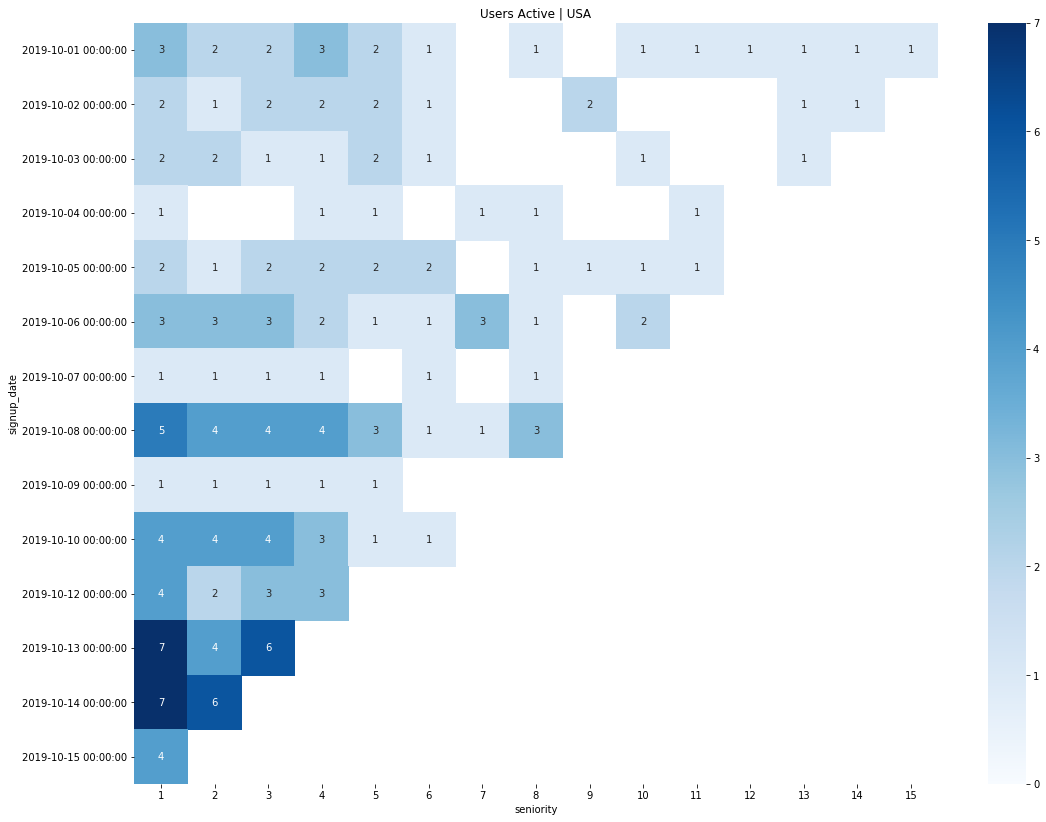

In [ ]:
# USA Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | USA')
ax = sns.heatmap(data=cohort_counts_usa, annot=True, vmin=0.0, cmap = 'Blues')
ax.set_yticklabels(cohort_counts_usa.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_USA.png")
plt.show()

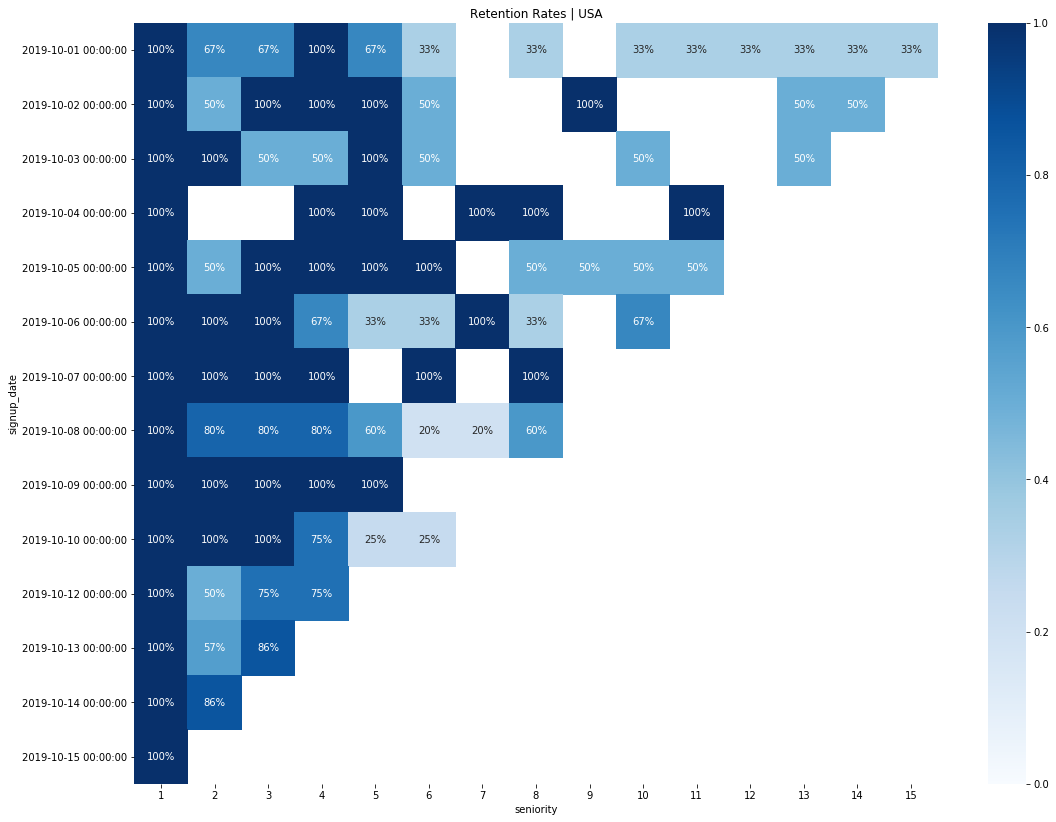

In [ ]:
# USA Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | USA')
ax = sns.heatmap(data=retention_usa, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention_usa.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_USA.png")
plt.show()

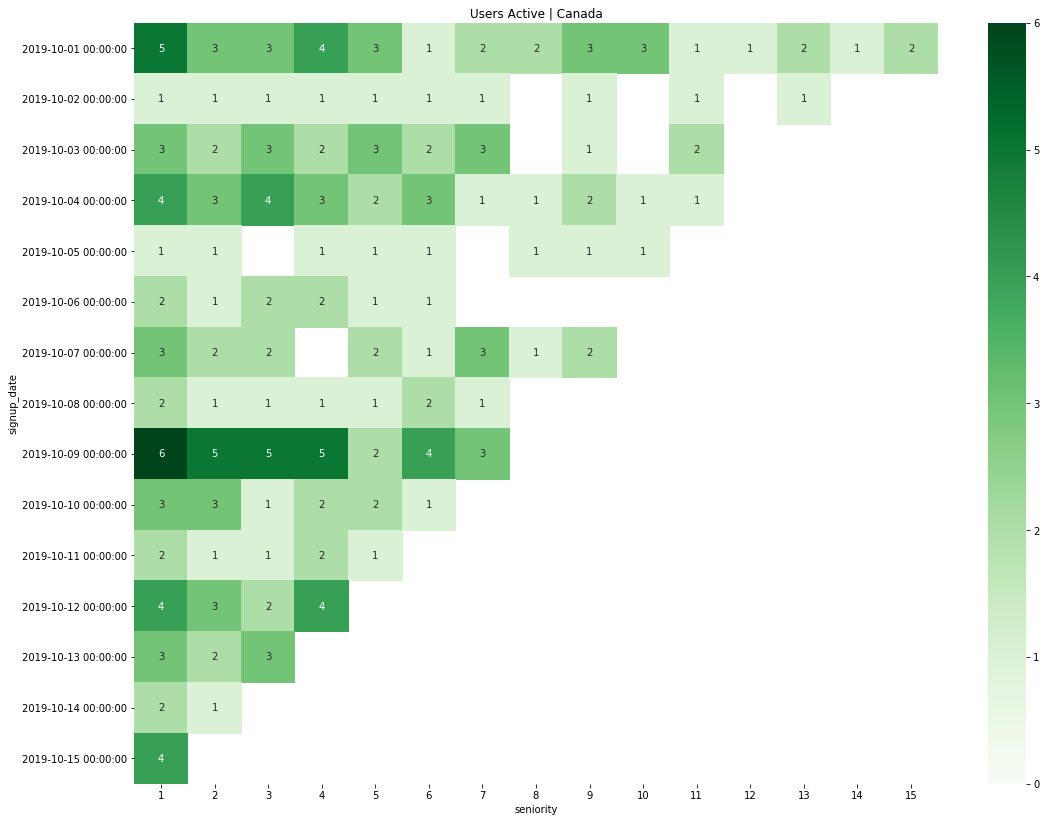

In [ ]:
# Canada Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Canada')
ax = sns.heatmap(data=cohort_counts_canada, annot=True, vmin=0.0, cmap = 'Greens')
ax.set_yticklabels(cohort_counts_canada.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Canada.png")
plt.show()

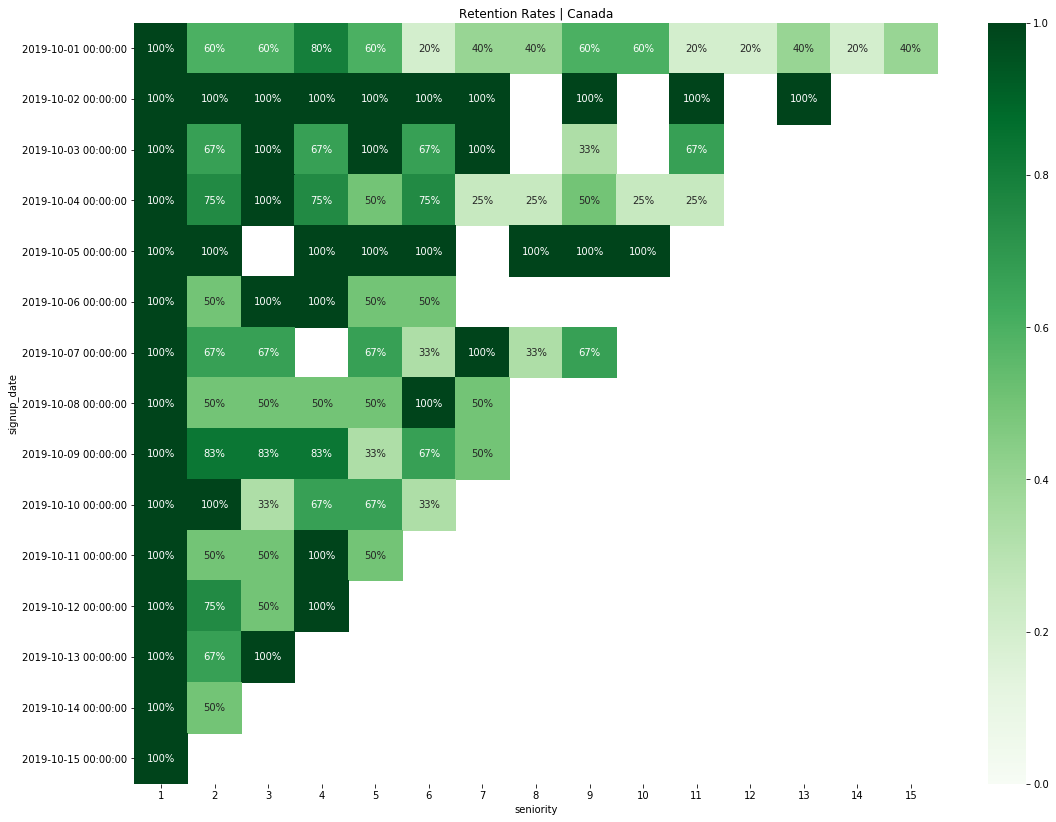

In [ ]:
# Canada Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Canada')
ax = sns.heatmap(data=retention_canada, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Greens')
ax.set_yticklabels(retention_canada.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Canada.png")
plt.show()

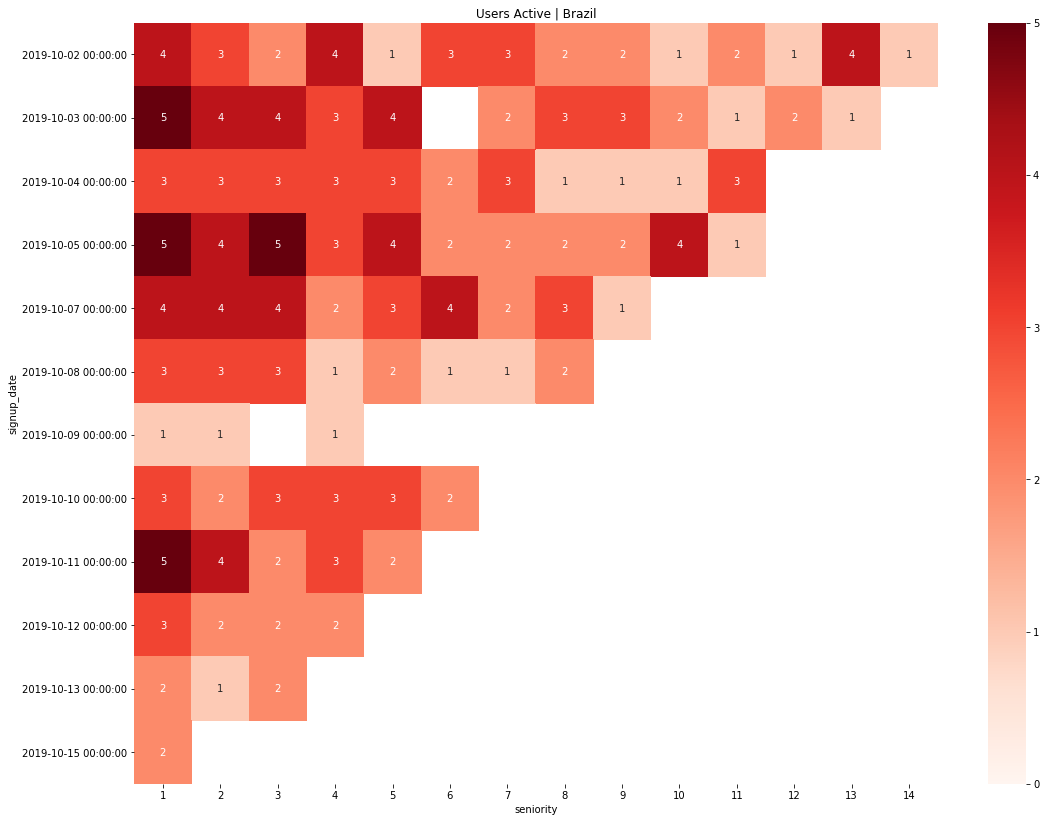

In [ ]:
# Brazil Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Brazil')
ax = sns.heatmap(data=cohort_counts_brazil, annot=True, vmin=0.0, cmap = 'Reds')
ax.set_yticklabels(cohort_counts_brazil.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Brazil.png")
plt.show()

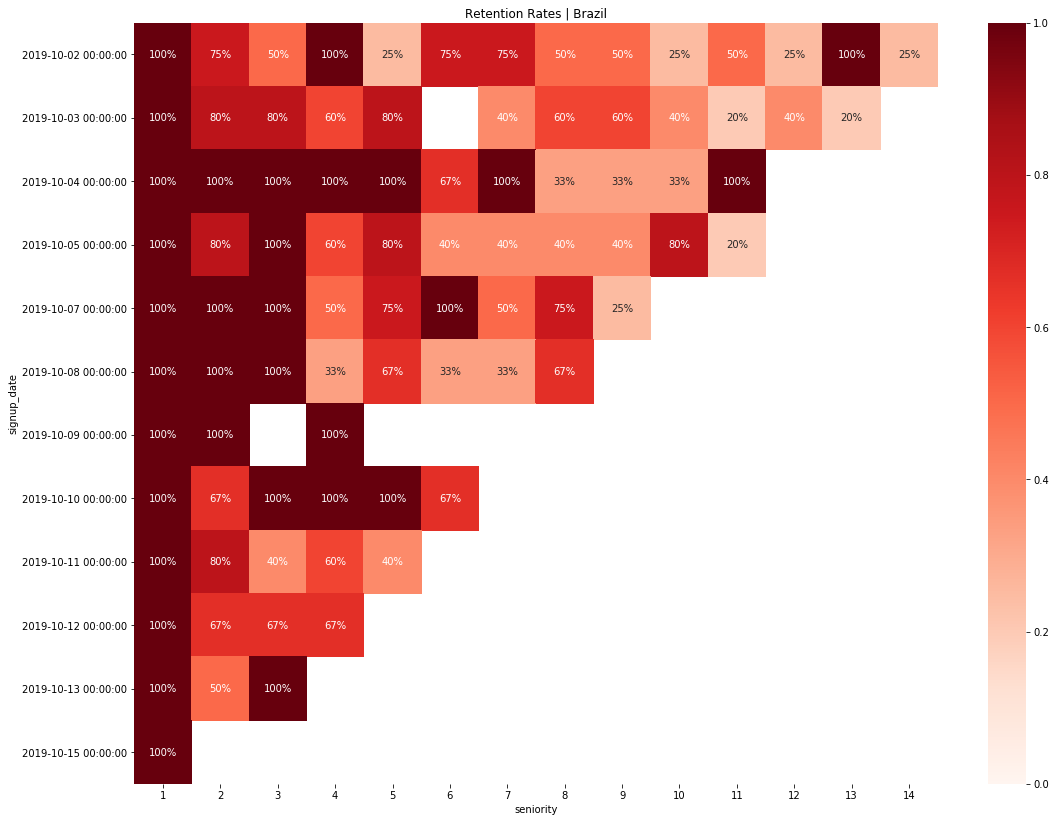

In [ ]:
# Brazil Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Brazil')
ax = sns.heatmap(data=retention_brazil, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_brazil.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Brazil.png")
plt.show()

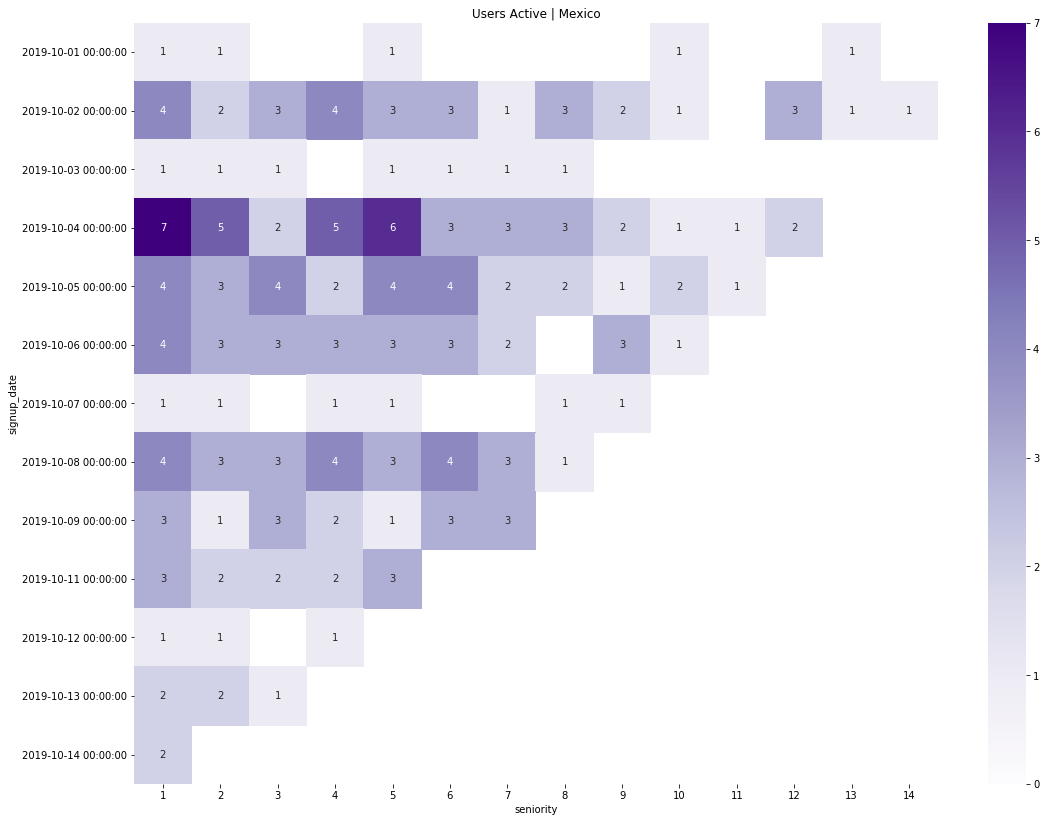

In [ ]:
# Mexico Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Mexico')
ax = sns.heatmap(data=cohort_counts_mexico, annot=True, vmin=0.0, cmap = 'Purples')
ax.set_yticklabels(cohort_counts_mexico.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Mexico.png")
plt.show()

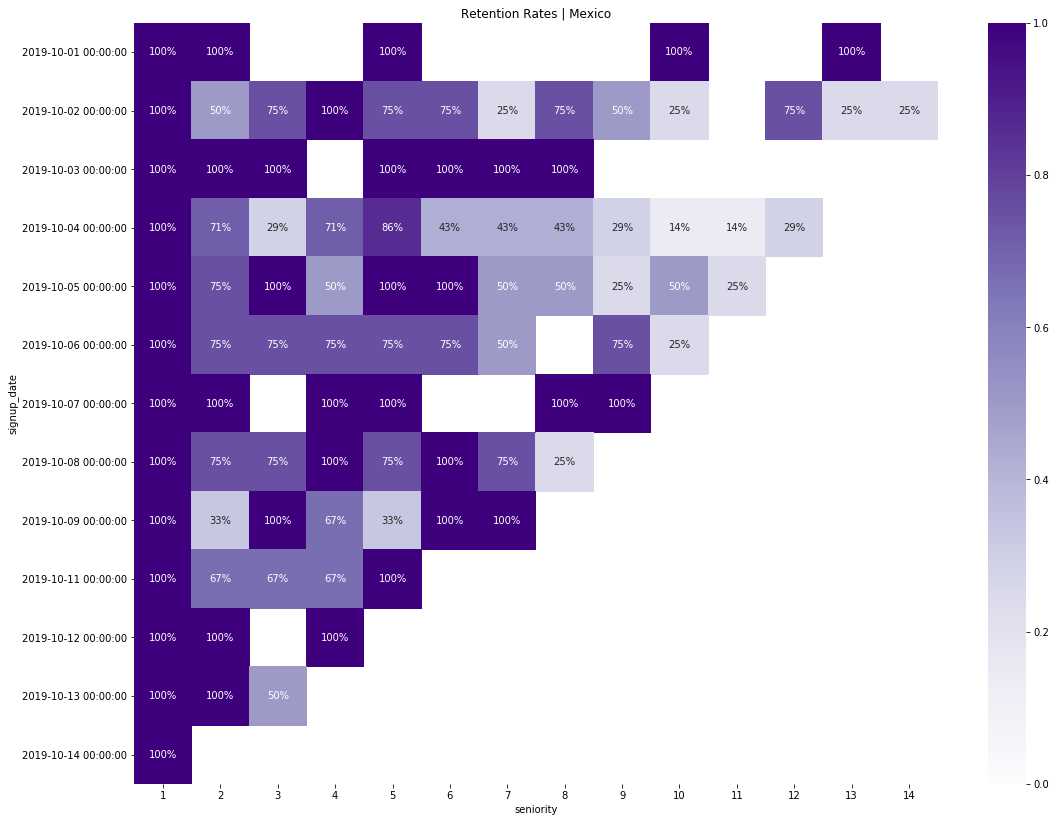

In [ ]:
# Mexico Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Mexico')
ax = sns.heatmap(data=retention_mexico, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Purples')
ax.set_yticklabels(retention_mexico.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Mexico.png")
plt.show()

## Connect to SQL Database
Use SQLAlchemy to connect to a SQL database and generate tables.

In [ ]:
import sys
sys.path.append('../')
from config import db_user, db_password, db_host, db_port, db_name
from sqlalchemy import create_engine, inspect

In [ ]:
# configure the connection string
rds_connection_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
        
# connect to the database
engine = create_engine(rds_connection_string)
conn = engine.connect()

In [ ]:
#Append data to tables
usa.to_sql(name='usa', con=conn, if_exists='append', index=False)

In [ ]:
canada.to_sql(name='canada', con=conn, if_exists='append', index=False)

In [ ]:
brazil.to_sql(name='brazil', con=conn, if_exists='append', index=False)

In [ ]:
mexico.to_sql(name='mexico', con=conn, if_exists='append', index=False)

In [ ]:
# Use inspector to find table names
Inspector = inspect(engine)
Inspector.get_table_names()

['usa', 'canada', 'brazil', 'mexico']

In [ ]:
# Check USA table
pd.read_sql_query('select * from usa', con=conn).head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10002,2019-10-01,2019-10-01,0,110,United States,1
1,U10002,2019-10-01,2019-10-04,1,51,United States,4
2,U10002,2019-10-01,2019-10-11,1,81,United States,11
3,U10002,2019-10-01,2019-10-12,0,21,United States,12
4,U10003,2019-10-01,2019-10-01,2,112,United States,1


In [ ]:
# Query USA Table
pd.read_sql_query('select * from usa where seniority > 5', con=conn).head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10002,2019-10-01,2019-10-11,1,81,United States,11
1,U10002,2019-10-01,2019-10-12,0,21,United States,12
2,U10003,2019-10-01,2019-10-06,0,97,United States,6
3,U10003,2019-10-01,2019-10-10,0,98,United States,10
4,U10003,2019-10-01,2019-10-14,1,22,United States,14
